In [1]:
#Python package for google AutoML
#google-cloud-automl
from google.cloud import automl
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#For google authentication purpose.
#Update full path of service account credential file (JSON file)
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "secert/AutoML_BallType_ServiceKey.json"


project_id = 'alpine-sentry-349911'

model_id = "ICN2781255344389619712" # In the train tab

compute_region = 'us-central1'


file_path = 'data/random_balls/1.jpg'

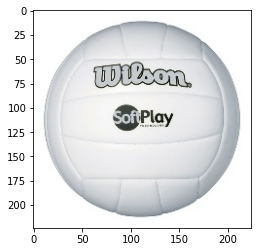

In [3]:
img = plt.imread(file_path)
plt.imshow(img)

In [4]:
prediction_client = automl.PredictionServiceClient()

# Get the full path of the model.
model_full_id = automl.AutoMlClient.model_path(project_id, 
                                               compute_region, 
                                               model_id)
print(model_full_id)

projects/alpine-sentry-349911/locations/us-central1/models/ICN2781255344389619712


In [5]:
# Read the file.
with open(file_path, "rb") as content_file:
    content = content_file.read()


image = automl.Image(image_bytes=content)
payload = automl.ExamplePayload(image=image)

params = {"score_threshold": "0.5"}

request = automl.PredictRequest(name=model_full_id, 
                                payload=payload, 
                                params=params)

response = prediction_client.predict(request=request)

print("Prediction results:")
for result in response.payload:
    print("Predicted class name: {}".format(result.display_name))
    print("Predicted class score: {}".format(result.classification.score))

Prediction results:
Predicted class name: volleyball
Predicted class score: 0.9999998807907104


## Multiple Predictions

In [6]:
import glob

In [7]:
prediction_client = automl.PredictionServiceClient()

# Get the full path of the model.
model_full_id = automl.AutoMlClient.model_path(project_id, 
                                               compute_region, 
                                               model_id)
print(model_full_id)

projects/alpine-sentry-349911/locations/us-central1/models/ICN2781255344389619712


In [9]:
image_paths = glob.glob('data/random_balls/*')
for img in image_paths:
    file_path = img 
    with open(file_path, "rb") as content_file:
        content = content_file.read()
        
    image = automl.Image(image_bytes=content)
    payload = automl.ExamplePayload(image=image)

    params = {"score_threshold": "0.5"}

    request = automl.PredictRequest(name=model_full_id, 
                                    payload=payload, 
                                    params=params)

    response = prediction_client.predict(request=request)

    print("Prediction results:")
    for result in response.payload:
        print("Predicted class name: {}".format(result.display_name))
        print("Predicted class score: {}".format(result.classification.score))

Prediction results:
Predicted class name: volleyball
Predicted class score: 0.9999998807907104
Prediction results:
Predicted class name: eyeball
Predicted class score: 1.0
Prediction results:
Predicted class name: basketball
Predicted class score: 0.999042809009552
Prediction results:
Predicted class name: baseball
Predicted class score: 0.9999996423721313
